In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Load and Examine the Data

In [14]:
# Load the data
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [15]:
# Display the first few rows
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [16]:
# Check for missing values
print(data.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [17]:
# Display basic statistics
print(data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [18]:
# Check the distribution of the target variable
print(data['RiskLevel'].value_counts(normalize=True))

RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64


 Visualize the Data

<Figure size 1500x1000 with 0 Axes>

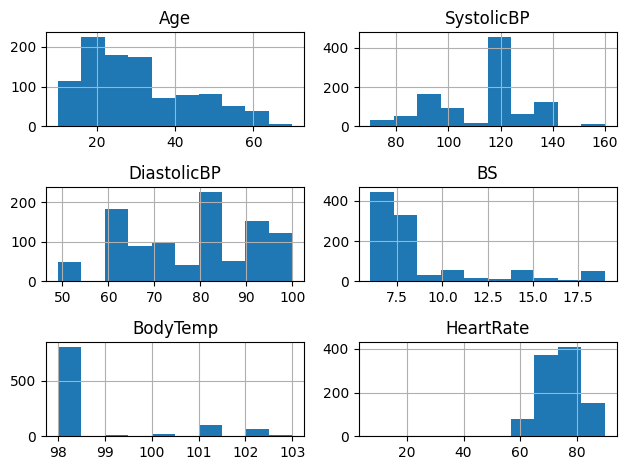

In [19]:
# Visualize the distribution of features
plt.figure(figsize=(15, 10))
data.hist()
plt.tight_layout()
plt.show()

In [26]:
# Ensure all columns are numeric
numeric_data = data.select_dtypes(include=[np.number])



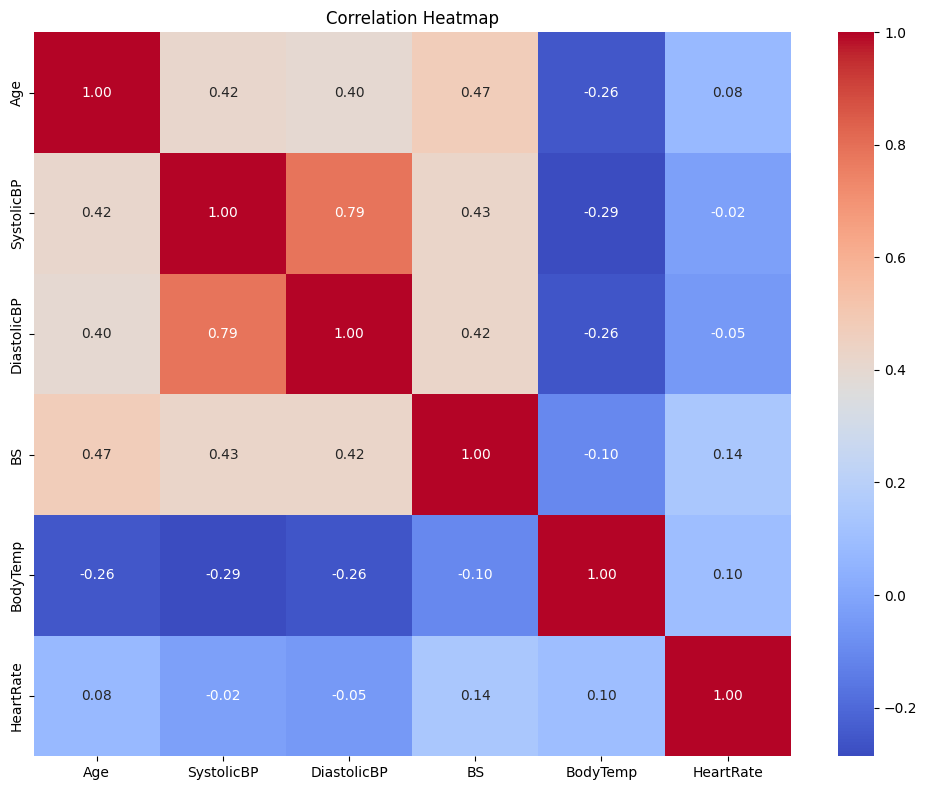

In [27]:
 #Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [28]:
# Check if RiskLevel is categorical
if data['RiskLevel'].dtype == 'object':
    # Encode RiskLevel if it's categorical
    data['RiskLevel'] = pd.Categorical(data['RiskLevel']).codes

In [29]:
# Ensure all columns are numeric
numeric_data = data.select_dtypes(include=[np.number])

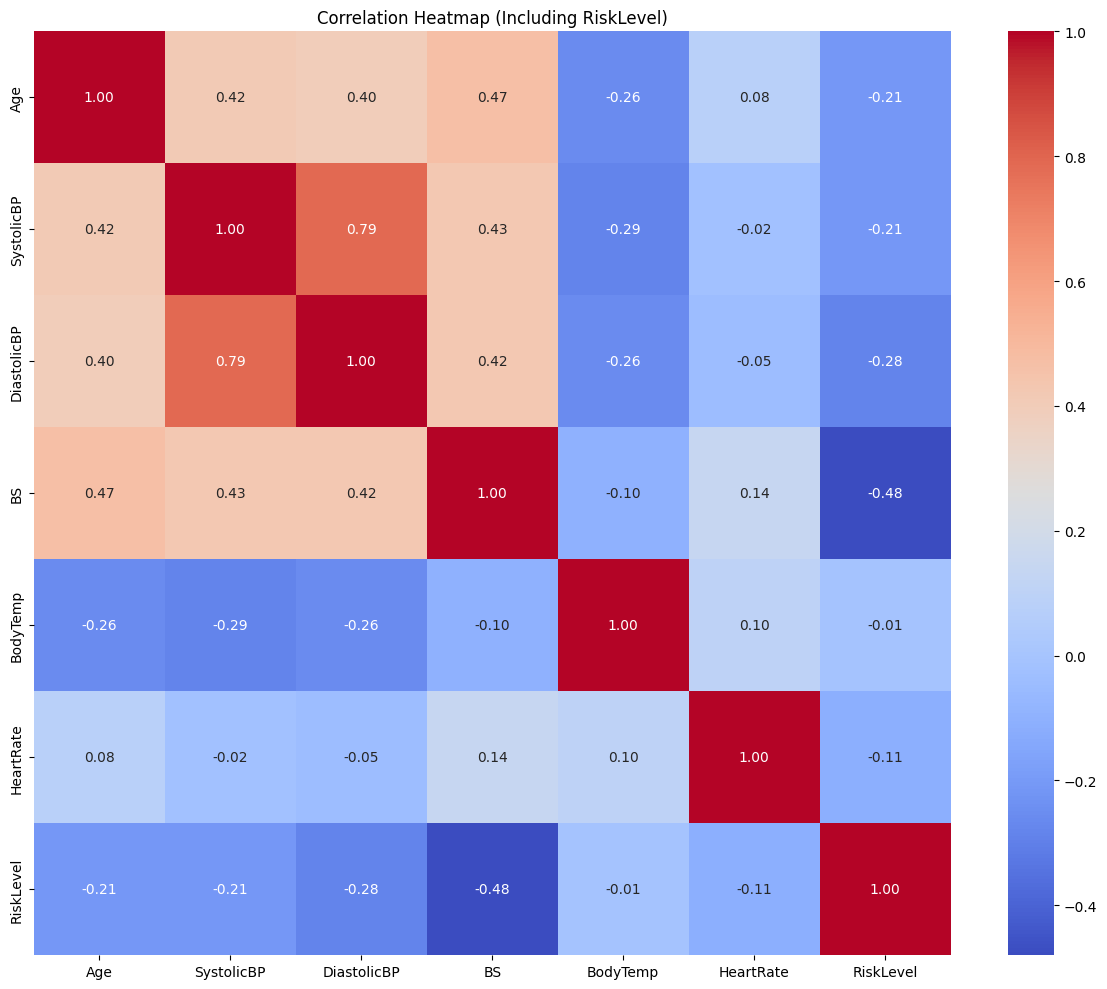

In [30]:
 #Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including RiskLevel)')
plt.tight_layout()
plt.show()

In [32]:
# Encode the target variable
data['RiskLevel'] = pd.Categorical(data['RiskLevel']).codes


In [33]:
# Separate features and target
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
# Train the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test_scaled)


In [45]:
 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8079

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.86      0.75      0.80        80
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203

